## Carga de los DataFrame base 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
users_items_base1 = pd.read_csv('data/users_items_base1.csv')
users_reviews_base1 = pd.read_csv('data/users_reviews_base1.csv')
steam_games_base1 = pd.read_csv('data/steam_games_base1.csv')

## Analisis EDA

In [4]:
print(users_items_base1.columns)
print(users_reviews_base1.columns)
print(steam_games_base1.columns)

Index(['Unnamed: 0', 'user_id', 'items_count', 'steam_id', 'item_id',
       'item_name', 'playtime_forever', 'playtime_2weeks'],
      dtype='object')
Index(['Unnamed: 0', 'user_id', 'funny', 'posted', 'last_edited', 'item_id',
       'helpful', 'recommend', 'sentiment_analysis'],
      dtype='object')
Index(['Unnamed: 0', 'publisher', 'genres', 'app_name', 'title',
       'release_date', 'price', 'id', 'developer', 'year'],
      dtype='object')


----
----
# Hago un data listado de juegos con su id


In [5]:
col1 = ['item_id','item_name']
col2 = ['id','title']

nombre_juegos = users_items_base1[col1]
nombre_juegos_2 = steam_games_base1[col2]

# Cambiar el nombre de las columnas
nombre_juegos_2 = nombre_juegos_2.rename(columns={'id': 'item_id', 'title': 'item_name'})

# Elimino los duplicados
nombre_juegos.drop_duplicates(inplace=True)
nombre_juegos_2.drop_duplicates(inplace=True)

# Fusionar los DataFrames en uno solo basado en la columna 'id'
nombre_juegos_total = pd.merge(nombre_juegos, nombre_juegos_2, on='item_id', how='outer')

# Elimino los duplicados de la union
nombre_juegos_total.drop_duplicates(inplace=True)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14776\1460050101.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nombre_juegos.drop_duplicates(inplace=True)


In [6]:
#Generamos un cruce de informacion entre columnas que tienen los datos vacios

# Rellenar NaN en 'item_name_y' con los valores de 'item_name_x'
nombre_juegos_total['item_name_y'] = nombre_juegos_total['item_name_y'].fillna(nombre_juegos_total['item_name_x'])

# Rellenar NaN en 'item_name_x' con los valores de 'item_name_y'
nombre_juegos_total['item_name_x'] = nombre_juegos_total['item_name_x'].fillna(nombre_juegos_total['item_name_y'])

# Borro la columna sobrante
nombre_juegos_total.drop(columns='item_name_y', inplace=True)

# Cambiar el nombre de la columna
nombre_juegos_total = nombre_juegos_total.rename(columns={'item_name_x': 'item_name'})

In [7]:
#DataFrame con nombre e item_id de todos los juegos registrados
nombre_juegos_total

,item_id,item_name
0,10.0,Counter-Strike
1,20.0,Team Fortress Classic
2,30.0,Day of Defeat
3,40.0,Deathmatch Classic
4,50.0,Half-Life: Opposing Force
...,...,...
16474,754620.0,High School Simulator
16475,761480.0,Snail Trek - Chapter 3: Lettuce Be
16476,747320.0,Bravium
16477,745400.0,Kebab it Up!


-----

In [8]:
# Fusionar users_reviews_base1 con nombres de juegos para agrregarle esa columna
users_reviews_base1 = pd.merge(users_reviews_base1, nombre_juegos_total, left_on='item_id', right_on='item_id', how='left')


In [9]:
users_items_base1.head(3)

,Unnamed: 0,user_id,items_count,steam_id,item_id,item_name,playtime_forever,playtime_2weeks
0,0,76561197970982479,277,76561197970982479,10.0,Counter-Strike,6.0,0.0
1,1,76561197970982479,277,76561197970982479,20.0,Team Fortress Classic,0.0,0.0
2,2,76561197970982479,277,76561197970982479,30.0,Day of Defeat,7.0,0.0


---
----
---

----
----
# Hago un listado de juegos con su genero


In [10]:
steam_games_base1.columns

Index(['Unnamed: 0', 'publisher', 'genres', 'app_name', 'title',
       'release_date', 'price', 'id', 'developer', 'year'],
      dtype='object')

In [11]:
# Filtro las columnas necesarias
df_generos = steam_games_base1[['genres','title','id']]

In [12]:
# Elimino los duplicados
df_generos.drop_duplicates(inplace=True)
df_generos

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14776\1528941974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_generos.drop_duplicates(inplace=True)


,genres,title,id
0,Action,Lost Summoner Kitty,761140
1,Casual,Lost Summoner Kitty,761140
2,Indie,Lost Summoner Kitty,761140
3,Simulation,Lost Summoner Kitty,761140
4,Strategy,Lost Summoner Kitty,761140
...,...,...,...
34270,Adventure,Kebab it Up!,745400
34271,Casual,Kebab it Up!,745400
34272,Indie,Kebab it Up!,745400
34273,Casual,EXIT 2 - Directions,658870


In [13]:
nombre_juegos_total

,item_id,item_name
0,10.0,Counter-Strike
1,20.0,Team Fortress Classic
2,30.0,Day of Defeat
3,40.0,Deathmatch Classic
4,50.0,Half-Life: Opposing Force
...,...,...
16474,754620.0,High School Simulator
16475,761480.0,Snail Trek - Chapter 3: Lettuce Be
16476,747320.0,Bravium
16477,745400.0,Kebab it Up!


In [14]:
df_juegos_y_genero = pd.merge(nombre_juegos_total,df_generos, left_on='item_id', right_on='id')

In [15]:
df_juegos_y_genero.drop_duplicates(inplace=True)
df_juegos_y_genero = df_juegos_y_genero.drop(columns=['id','title'])
df_juegos_y_genero


,item_id,item_name,genres
0,10.0,Counter-Strike,Action
1,20.0,Team Fortress Classic,Action
2,30.0,Day of Defeat,Action
3,40.0,Deathmatch Classic,Action
4,50.0,Half-Life: Opposing Force,Action
...,...,...,...
34270,745400.0,Kebab it Up!,Adventure
34271,745400.0,Kebab it Up!,Casual
34272,745400.0,Kebab it Up!,Indie
34273,658870.0,EXIT 2 - Directions,Casual


----
---
---

## Primeros Analisis Graficos y de correlación

In [16]:
"""
# Pairplot para visualizar las relaciones entre variables
sns.pairplot(users_items_base1)
plt.suptitle('Pairplot de Variables', y=1.02)
plt.show()
"""

"\n# Pairplot para visualizar las relaciones entre variables\nsns.pairplot(users_items_base1)\nplt.suptitle('Pairplot de Variables', y=1.02)\nplt.show()\n"

# Filtrado de columnas

In [17]:
users_items_base1.columns

Index(['Unnamed: 0', 'user_id', 'items_count', 'steam_id', 'item_id',
       'item_name', 'playtime_forever', 'playtime_2weeks'],
      dtype='object')

In [18]:
# Filtro las columnas deseadas
col_ui_base2 = ['user_id','items_count', 'item_id', 'playtime_forever']
users_items_base2 = users_items_base1[col_ui_base2]

In [19]:
# Fusionar users_items_base1 con nombres de juegos para agregarle esa columna
users_items_base2 = pd.merge(users_items_base2, nombre_juegos_total, on='item_id', how='left')

In [20]:
users_items_base2

,user_id,items_count,item_id,playtime_forever,item_name
0,76561197970982479,277,10.0,6.0,Counter-Strike
1,76561197970982479,277,20.0,0.0,Team Fortress Classic
2,76561197970982479,277,30.0,7.0,Day of Defeat
3,76561197970982479,277,40.0,0.0,Deathmatch Classic
4,76561197970982479,277,50.0,0.0,Half-Life: Opposing Force
...,...,...,...,...,...
5113966,76561198329548331,7,373330.0,0.0,All Is Dust
5113967,76561198329548331,7,388490.0,3.0,One Way To Die: Steam Edition
5113968,76561198329548331,7,521570.0,4.0,You Have 10 Seconds 2
5113969,76561198329548331,7,519140.0,3.0,Minds Eyes


In [21]:
users_reviews_base1.columns

Index(['Unnamed: 0', 'user_id', 'funny', 'posted', 'last_edited', 'item_id',
       'helpful', 'recommend', 'sentiment_analysis', 'item_name'],
      dtype='object')

In [22]:
# Filtro columnas
col_ur_base2 = ['user_id','item_id','item_name','recommend', 'sentiment_analysis']
users_reviews_base2 = users_reviews_base1[col_ur_base2]

In [23]:
users_reviews_base2

,user_id,item_id,item_name,recommend,sentiment_analysis
0,76561197970982479,1250.0,Killing Floor,True,2
1,76561197970982479,22200.0,Zeno Clash,True,2
2,76561197970982479,43110.0,Metro 2033,True,2
3,js41637,251610.0,Barbie™ Dreamhouse Party™,True,2
4,js41637,227300.0,Euro Truck Simulator 2,True,2
...,...,...,...,...,...
58454,76561198312638244,70.0,Half-Life,True,2
58455,76561198312638244,362890.0,Black Mesa,True,2
58456,LydiaMorley,273110.0,Counter-Strike Nexon: Zombies,True,2
58457,LydiaMorley,730.0,Counter-Strike: Global Offensive,True,2


In [24]:
steam_games_base1.columns

Index(['Unnamed: 0', 'publisher', 'genres', 'app_name', 'title',
       'release_date', 'price', 'id', 'developer', 'year'],
      dtype='object')

In [25]:
# Filtro columnas
col_sg_base2 = ['publisher', 'genres','title','price','id','developer','year']
steam_games_base2 = steam_games_base1[col_sg_base2]

In [26]:
users_items_base2

,user_id,items_count,item_id,playtime_forever,item_name
0,76561197970982479,277,10.0,6.0,Counter-Strike
1,76561197970982479,277,20.0,0.0,Team Fortress Classic
2,76561197970982479,277,30.0,7.0,Day of Defeat
3,76561197970982479,277,40.0,0.0,Deathmatch Classic
4,76561197970982479,277,50.0,0.0,Half-Life: Opposing Force
...,...,...,...,...,...
5113966,76561198329548331,7,373330.0,0.0,All Is Dust
5113967,76561198329548331,7,388490.0,3.0,One Way To Die: Steam Edition
5113968,76561198329548331,7,521570.0,4.0,You Have 10 Seconds 2
5113969,76561198329548331,7,519140.0,3.0,Minds Eyes


In [27]:
# Agrupo por item_id y sumo la cantidad de tiempo jugado
users_items_groupby_game = users_items_base2.groupby('item_id')['playtime_forever'].sum().reset_index(name='tiempo jugado')
users_items_groupby_game

,item_id,tiempo jugado
0,10.0,17152962.0
1,20.0,960610.0
2,30.0,756375.0
3,40.0,154432.0
4,50.0,727194.0
...,...,...
10973,528580.0,0.0
10974,528660.0,182.0
10975,529670.0,0.0
10976,529820.0,0.0


In [28]:
users_items_base2

,user_id,items_count,item_id,playtime_forever,item_name
0,76561197970982479,277,10.0,6.0,Counter-Strike
1,76561197970982479,277,20.0,0.0,Team Fortress Classic
2,76561197970982479,277,30.0,7.0,Day of Defeat
3,76561197970982479,277,40.0,0.0,Deathmatch Classic
4,76561197970982479,277,50.0,0.0,Half-Life: Opposing Force
...,...,...,...,...,...
5113966,76561198329548331,7,373330.0,0.0,All Is Dust
5113967,76561198329548331,7,388490.0,3.0,One Way To Die: Steam Edition
5113968,76561198329548331,7,521570.0,4.0,You Have 10 Seconds 2
5113969,76561198329548331,7,519140.0,3.0,Minds Eyes


In [29]:
steam_games_base2

,publisher,genres,title,price,id,developer,year
0,Kotoshiro,Action,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
1,Kotoshiro,Casual,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
2,Kotoshiro,Indie,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
3,Kotoshiro,Simulation,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
4,Kotoshiro,Strategy,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
...,...,...,...,...,...,...,...
34270,Bidoniera Games,Adventure,Kebab it Up!,1.99,745400,Bidoniera Games,2018
34271,Bidoniera Games,Casual,Kebab it Up!,1.99,745400,Bidoniera Games,2018
34272,Bidoniera Games,Indie,Kebab it Up!,1.99,745400,Bidoniera Games,2018
34273,SIXNAILS,Casual,EXIT 2 - Directions,4.99,658870,"xropi,stev3ns",2017


In [30]:
# Fusionar users_items_base2 con steam_games_base2 para que me figuren genero y tiempo jugado
prueba2 = pd.merge(steam_games_base2, users_items_base2, left_on='title', right_on='item_name')
prueba2

,publisher,genres,title,price,id,developer,year,user_id,items_count,item_id,playtime_forever,item_name
0,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,UTNerd24,188,282010.0,5.0,Carmageddon Max Pack
1,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,I_DID_911_JUST_SAYING,154,282010.0,0.0,Carmageddon Max Pack
2,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,76561197962104795,79,282010.0,0.0,Carmageddon Max Pack
3,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,r3ap3r78,331,282010.0,0.0,Carmageddon Max Pack
4,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,saint556,583,282010.0,13.0,Carmageddon Max Pack
...,...,...,...,...,...,...,...,...,...,...,...,...
7410594,Valve,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,76561198273508956,15,80.0,0.0,Counter-Strike: Condition Zero
7410595,Valve,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,76561198282090798,5,80.0,0.0,Counter-Strike: Condition Zero
7410596,Valve,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,943525,58,80.0,0.0,Counter-Strike: Condition Zero
7410597,Valve,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,76561198283312749,49,80.0,9.0,Counter-Strike: Condition Zero


In [31]:
# Generamos los dataframe necesarios para esta funcion en formato csv para poder ser cargados

users_items_base2.to_csv("df_varios/users_items_base2.csv", index=False)
steam_games_base2.to_csv("df_varios/steam_games_base2.csv", index=False)
prueba2.to_csv("df_varios/prueba2.csv", index=False)

# Comentado, para que se haga una sola vez!

In [32]:
"""
# Ordenar el DataFrame por 'playtime_forever' de mayor a menor
prueba2_sorted = prueba2.sort_values(by='playtime_forever', ascending=False)

# Grafico
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='playtime_forever', data=prueba2_sorted, ci=None)
plt.title('Relación entre Género y Tiempo Jugado')
plt.xlabel('Género')
plt.ylabel('Tiempo Jugado')
plt.xticks(rotation=90)
plt.show()

"""

"\n# Ordenar el DataFrame por 'playtime_forever' de mayor a menor\nprueba2_sorted = prueba2.sort_values(by='playtime_forever', ascending=False)\n\n# Grafico\nplt.figure(figsize=(12, 6))\nsns.barplot(x='genres', y='playtime_forever', data=prueba2_sorted, ci=None)\nplt.title('Relación entre Género y Tiempo Jugado')\nplt.xlabel('Género')\nplt.ylabel('Tiempo Jugado')\nplt.xticks(rotation=90)\nplt.show()\n\n"

In [33]:
"""
# Ordenar el DataFrame por 'playtime_forever' de mayor a menor
prueba2_sorted = prueba2.sort_values(by='playtime_forever', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='playtime_forever', data=prueba2_sorted, ci=None)
plt.title('Relación entre Género y Tiempo Jugado')
plt.xlabel('Género')
plt.ylabel('Tiempo Jugado')
plt.xticks(rotation=90)
plt.show()
"""

SyntaxError: unterminated string literal (detected at line 12) (1756331921.py, line 12)

In [34]:
prueba2

,publisher,genres,title,price,id,developer,year,user_id,items_count,item_id,playtime_forever,item_name
0,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,UTNerd24,188,282010.0,5.0,Carmageddon Max Pack
1,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,I_DID_911_JUST_SAYING,154,282010.0,0.0,Carmageddon Max Pack
2,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,76561197962104795,79,282010.0,0.0,Carmageddon Max Pack
3,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,r3ap3r78,331,282010.0,0.0,Carmageddon Max Pack
4,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,saint556,583,282010.0,13.0,Carmageddon Max Pack
...,...,...,...,...,...,...,...,...,...,...,...,...
7410594,Valve,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,76561198273508956,15,80.0,0.0,Counter-Strike: Condition Zero
7410595,Valve,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,76561198282090798,5,80.0,0.0,Counter-Strike: Condition Zero
7410596,Valve,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,943525,58,80.0,0.0,Counter-Strike: Condition Zero
7410597,Valve,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,76561198283312749,49,80.0,9.0,Counter-Strike: Condition Zero


In [35]:
# Filtro columnas que me interesan
colprueba3 = ['genres', 'id', 'year', 'items_count', 'playtime_forever']
prueba3 = prueba2[colprueba3]

In [36]:
prueba3

,genres,id,year,items_count,playtime_forever
0,Action,282010,1997,188,5.0
1,Action,282010,1997,154,0.0
2,Action,282010,1997,79,0.0
3,Action,282010,1997,331,0.0
4,Action,282010,1997,583,13.0
...,...,...,...,...,...
7410594,Action,80,2004,15,0.0
7410595,Action,80,2004,5,0.0
7410596,Action,80,2004,58,0.0
7410597,Action,80,2004,49,9.0


In [37]:
# Convertir la variable categórica usando one-hot encoding
df_encoded = pd.get_dummies(prueba3, columns=['genres'])

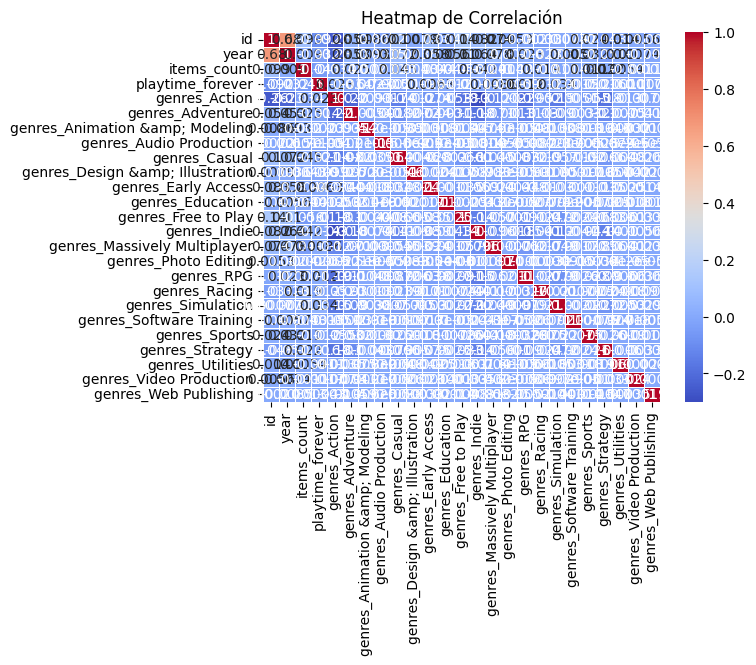

In [38]:
# Heatmap de correlación
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlación')
plt.show()

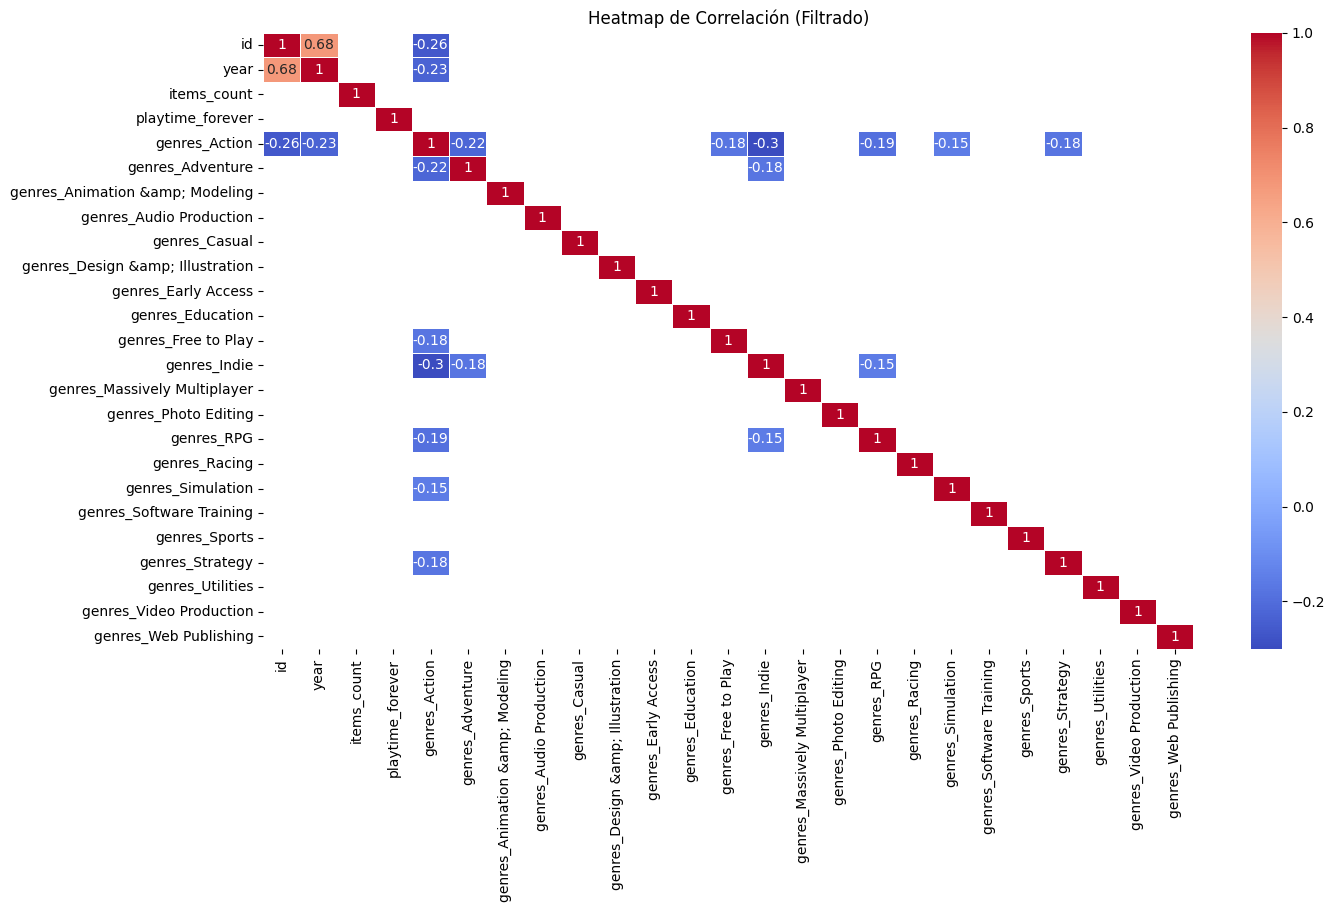

In [39]:
# Heatmap de correlación
correlation_matrix = df_encoded.corr()

# Filtrar la máscara para valores mayores a 0.15 o menores a -0.15
filtered_corr_matrix = correlation_matrix[(correlation_matrix > 0.15) | (correlation_matrix < -0.15)]

plt.figure(figsize=(15, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlación (Filtrado)')
plt.show()


Puedo ver una tendencia entre generos, y a la ves, entre algunos generos se ve una tendencia de relación. <br>
Dandome una idea que puedo llegar a recomendar juegos usando el genero y el tiempo juegado.

In [40]:
prueba2

,publisher,genres,title,price,id,developer,year,user_id,items_count,item_id,playtime_forever,item_name
0,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,UTNerd24,188,282010.0,5.0,Carmageddon Max Pack
1,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,I_DID_911_JUST_SAYING,154,282010.0,0.0,Carmageddon Max Pack
2,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,76561197962104795,79,282010.0,0.0,Carmageddon Max Pack
3,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,r3ap3r78,331,282010.0,0.0,Carmageddon Max Pack
4,Stainless Games Ltd,Action,Carmageddon Max Pack,9.99,282010,Stainless Games Ltd,1997,saint556,583,282010.0,13.0,Carmageddon Max Pack
...,...,...,...,...,...,...,...,...,...,...,...,...
7410594,Valve,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,76561198273508956,15,80.0,0.0,Counter-Strike: Condition Zero
7410595,Valve,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,76561198282090798,5,80.0,0.0,Counter-Strike: Condition Zero
7410596,Valve,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,943525,58,80.0,0.0,Counter-Strike: Condition Zero
7410597,Valve,Action,Counter-Strike: Condition Zero,9.99,80,Valve,2004,76561198283312749,49,80.0,9.0,Counter-Strike: Condition Zero


In [41]:
users_reviews_base2

,user_id,item_id,item_name,recommend,sentiment_analysis
0,76561197970982479,1250.0,Killing Floor,True,2
1,76561197970982479,22200.0,Zeno Clash,True,2
2,76561197970982479,43110.0,Metro 2033,True,2
3,js41637,251610.0,Barbie™ Dreamhouse Party™,True,2
4,js41637,227300.0,Euro Truck Simulator 2,True,2
...,...,...,...,...,...
58454,76561198312638244,70.0,Half-Life,True,2
58455,76561198312638244,362890.0,Black Mesa,True,2
58456,LydiaMorley,273110.0,Counter-Strike Nexon: Zombies,True,2
58457,LydiaMorley,730.0,Counter-Strike: Global Offensive,True,2


In [42]:
users_reviews_base2.to_csv("df_varios/users_reviews_base2.csv", index=False)

In [43]:
# columnas_ideales = ['item_id', 'item_name','genres','year','playtime_forever','user_id','recommend','sentiment_analysis']

# De prueba2 tengo: ['item_id', 'item_name','genres','year','playtime_forever']
# De users_reviews_base2: ['user_id','recommend','sentiment_analysis'] debo dejar item_name para conectar

col_prueba2 = ['item_id', 'item_name','genres','year','playtime_forever']
col_user_reviews_filtrado = ['item_name','user_id','recommend','sentiment_analysis']

# Primer filtrado de Prueba2 y de users_reviews_base2
prueba2_filtrado = prueba2[col_prueba2]
users_reviews_base2_filtrado = users_reviews_base2[col_user_reviews_filtrado]


In [ ]:
# Generamos los dataframe necesarios para esta funcion en formato csv para poder ser cargados

# prueba2_filtrado.to_csv("df_varios/prueba2_filtrado.csv", index=False)
# users_reviews_base2_filtrado.to_csv("df_varios/users_reviews_base2_filtrado.csv", index=False)

# Comentado, para que se haga una sola vez!

In [46]:
prueba2_filtrado

,item_id,item_name,genres,year,playtime_forever
0,282010.0,Carmageddon Max Pack,Action,1997,5.0
1,282010.0,Carmageddon Max Pack,Action,1997,0.0
2,282010.0,Carmageddon Max Pack,Action,1997,0.0
3,282010.0,Carmageddon Max Pack,Action,1997,0.0
4,282010.0,Carmageddon Max Pack,Action,1997,13.0
...,...,...,...,...,...
7410594,80.0,Counter-Strike: Condition Zero,Action,2004,0.0
7410595,80.0,Counter-Strike: Condition Zero,Action,2004,0.0
7410596,80.0,Counter-Strike: Condition Zero,Action,2004,0.0
7410597,80.0,Counter-Strike: Condition Zero,Action,2004,9.0


In [47]:
users_reviews_base2_filtrado

,item_name,user_id,recommend,sentiment_analysis
0,Killing Floor,76561197970982479,True,2
1,Zeno Clash,76561197970982479,True,2
2,Metro 2033,76561197970982479,True,2
3,Barbie™ Dreamhouse Party™,js41637,True,2
4,Euro Truck Simulator 2,js41637,True,2
...,...,...,...,...
58454,Half-Life,76561198312638244,True,2
58455,Black Mesa,76561198312638244,True,2
58456,Counter-Strike Nexon: Zombies,LydiaMorley,True,2
58457,Counter-Strike: Global Offensive,LydiaMorley,True,2


Filtro los Playtime forever = 2 <br>
y recommend = True <br>

Me quedo con los positivios <br>

y en prueba2 filtro los que tienen mas de 0 hs jugadas <br>



In [48]:
filtro_b2f = (users_reviews_base2_filtrado['recommend'] == True) & (users_reviews_base2_filtrado['sentiment_analysis'] == 2)

users_reviews_base2_filtrado = users_reviews_base2_filtrado[filtro_b2f]

users_reviews_base2_filtrado

,item_name,user_id,recommend,sentiment_analysis
0,Killing Floor,76561197970982479,True,2
1,Zeno Clash,76561197970982479,True,2
2,Metro 2033,76561197970982479,True,2
3,Barbie™ Dreamhouse Party™,js41637,True,2
4,Euro Truck Simulator 2,js41637,True,2
...,...,...,...,...
58454,Half-Life,76561198312638244,True,2
58455,Black Mesa,76561198312638244,True,2
58456,Counter-Strike Nexon: Zombies,LydiaMorley,True,2
58457,Counter-Strike: Global Offensive,LydiaMorley,True,2


In [49]:
filtro_p2f = prueba2_filtrado['playtime_forever'] > 0

prueba3_filtrado = prueba2_filtrado[filtro_p2f]

prueba3_filtrado

,item_id,item_name,genres,year,playtime_forever
0,282010.0,Carmageddon Max Pack,Action,1997,5.0
4,282010.0,Carmageddon Max Pack,Action,1997,13.0
5,282010.0,Carmageddon Max Pack,Action,1997,110.0
6,282010.0,Carmageddon Max Pack,Action,1997,13.0
7,282010.0,Carmageddon Max Pack,Action,1997,8.0
...,...,...,...,...,...
7410588,80.0,Counter-Strike: Condition Zero,Action,2004,203.0
7410590,80.0,Counter-Strike: Condition Zero,Action,2004,244.0
7410591,80.0,Counter-Strike: Condition Zero,Action,2004,7.0
7410597,80.0,Counter-Strike: Condition Zero,Action,2004,9.0


In [50]:
# Agrupo por Nombre de juego y genero, y sumo el tiempo jugado
tiempojugado_juegoygenero = prueba3_filtrado.groupby(['item_name', 'genres'])['playtime_forever'].sum().reset_index()

# Mostrar el DataFrame agrupado
tiempojugado_juegoygenero


,item_name,genres,playtime_forever
0,! That Bastard Is Trying To Steal Our Gold !,Action,742.0
1,! That Bastard Is Trying To Steal Our Gold !,Adventure,742.0
2,! That Bastard Is Trying To Steal Our Gold !,Casual,742.0
3,! That Bastard Is Trying To Steal Our Gold !,Indie,742.0
4,"""Glow Ball"" - The billiard puzzle game",Casual,21.0
...,...,...,...
14567,侠客风云传(Tale of Wuxia),Casual,19288.0
14568,侠客风云传(Tale of Wuxia),RPG,19288.0
14569,侠客风云传(Tale of Wuxia),Simulation,19288.0
14570,侠客风云传(Tale of Wuxia),Strategy,19288.0


posible data frame para datos
X = generos y tiempo jugado
Y = nombre juego

In [51]:
# Ordeno por 'tiempo_jugado'
tiempojugado_juegoygenero_ordenado = tiempojugado_juegoygenero.sort_values(by=['playtime_forever','genres', 'item_name'], ascending=[False, True, True])

# Muestro el DataFrame ordenado
tiempojugado_juegoygenero_ordenado


,item_name,genres,playtime_forever
2673,Counter-Strike: Global Offensive,Action,776096553.0
5077,Garry's Mod,Indie,442007885.0
5078,Garry's Mod,Simulation,442007885.0
12041,Terraria,Action,153156090.0
12042,Terraria,Adventure,153156090.0
...,...,...,...
3200,Decisive Campaigns: The Blitzkrieg from Warsaw...,Strategy,1.0
8133,NEO-NOW!,Strategy,1.0
9200,Powargrid,Strategy,1.0
13300,Trulon: The Shadow Engine,Strategy,1.0


In [52]:
# tiempojugado_juegoygenero_ordenado.to_csv("df_varios/tiempojugado_juegoygenero_ordenado.csv", index=False)

Análisis Exploratorio de Datos (EDA): <br>
Visualiza la distribución de géneros y tiempo jugado. <br>
Examina estadísticas descriptivas para entender la variabilidad en el tiempo jugado.

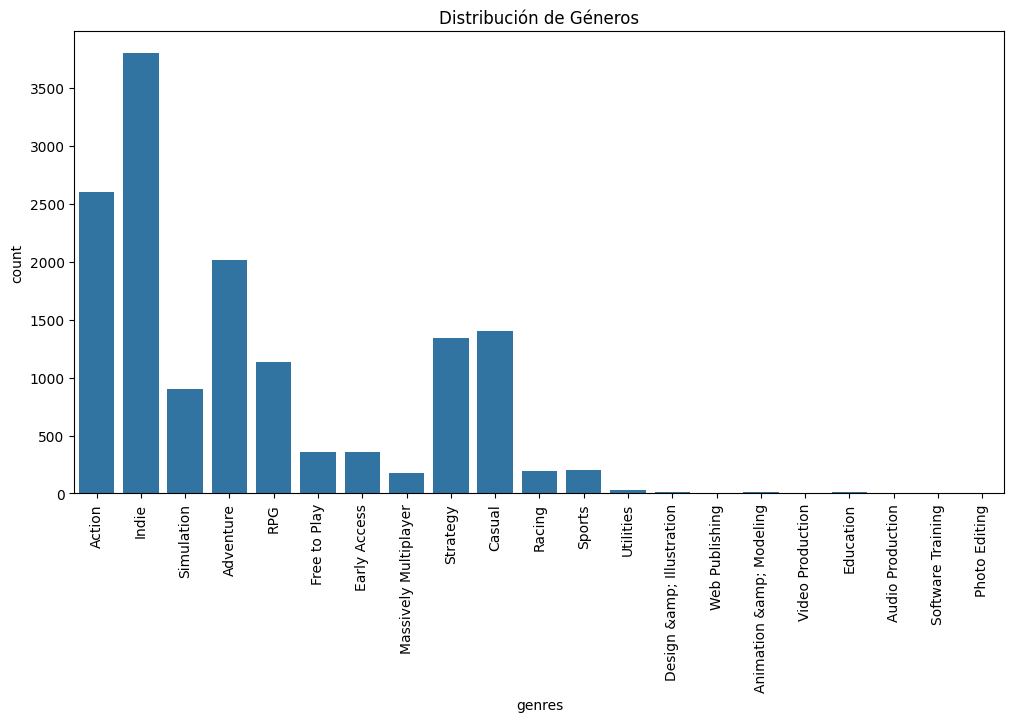

In [53]:
# Gráfico de barras para la distribución de géneros
plt.figure(figsize=(12, 6))
sns.countplot(x='genres', data=tiempojugado_juegoygenero_ordenado)
plt.title('Distribución de Géneros')
plt.xticks(rotation=90)
plt.show()

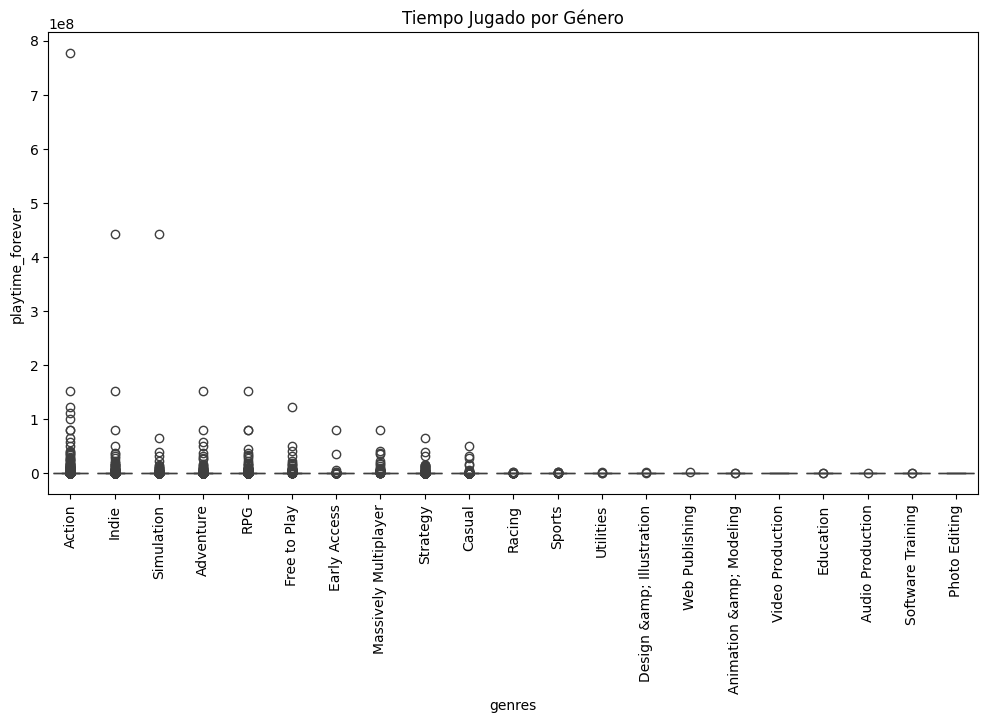

In [54]:
# Boxplot para el tiempo jugado por género
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='playtime_forever', data=tiempojugado_juegoygenero_ordenado)
plt.title('Tiempo Jugado por Género')
plt.xticks(rotation=90)
plt.show()

# Se puede ver una preferencia clara de 8 generos!

Codificación de Variables Categóricas: <br>
Codifica las variables categóricas (como géneros) utilizando técnicas como one-hot encoding.

In [55]:
# One-hot encoding para la columna 'genres'
df_encoded = pd.get_dummies(tiempojugado_juegoygenero_ordenado, columns=['genres'])

df_encoded_2 = df_encoded.drop(columns=['playtime_forever'])

df_encoded_2


,item_name,genres_Action,genres_Adventure,genres_Animation &amp; Modeling,genres_Audio Production,genres_Casual,genres_Design &amp; Illustration,genres_Early Access,genres_Education,genres_Free to Play,...,genres_Photo Editing,genres_RPG,genres_Racing,genres_Simulation,genres_Software Training,genres_Sports,genres_Strategy,genres_Utilities,genres_Video Production,genres_Web Publishing
2673,Counter-Strike: Global Offensive,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5077,Garry's Mod,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5078,Garry's Mod,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
12041,Terraria,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12042,Terraria,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,Decisive Campaigns: The Blitzkrieg from Warsaw...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
8133,NEO-NOW!,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9200,Powargrid,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
13300,Trulon: The Shadow Engine,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Preparación de Datos para el Modelo: <br>
Organizo los datos de manera que cada fila represente un juego y las columnas sean las características relevantes (géneros, tiempo jugado).

In [56]:
# Selecciona las columnas relevantes para el modelo
features_2 = ['genres_Action', 'genres_Adventure', 'genres_Casual', 'genres_Indie']

# Subconjunto del DataFrame con las columnas seleccionadas
model_data_2 = df_encoded_2[features_2]
model_data_2


,genres_Action,genres_Adventure,genres_Casual,genres_Indie
2673,True,False,False,False
5077,False,False,False,True
5078,False,False,False,False
12041,True,False,False,False
12042,False,True,False,False
...,...,...,...,...
3200,False,False,False,False
8133,False,False,False,False
9200,False,False,False,False
13300,False,False,False,False


In [57]:
# Selecciona las columnas relevantes para el modelo
features = ['genres_Action', 'genres_Adventure', 'genres_Casual', 'genres_Indie', 'playtime_forever']

# Subconjunto del DataFrame con las columnas seleccionadas
model_data = df_encoded[features]
model_data


,genres_Action,genres_Adventure,genres_Casual,genres_Indie,playtime_forever
2673,True,False,False,False,776096553.0
5077,False,False,False,True,442007885.0
5078,False,False,False,False,442007885.0
12041,True,False,False,False,153156090.0
12042,False,True,False,False,153156090.0
...,...,...,...,...,...
3200,False,False,False,False,1.0
8133,False,False,False,False,1.0
9200,False,False,False,False,1.0
13300,False,False,False,False,1.0


In [58]:
# Renombro el dataframe para darle un nombre referente a la función
df_funcion_recomendacion_juego = model_data.copy()

In [59]:
df_funcion_recomendacion_juego2 = model_data_2.copy()

In [60]:
df_funcion_recomendacion_juego_numerico2 = df_funcion_recomendacion_juego2.astype(int)

In [61]:
# Pasar de booleanos a int
# Convertir la matriz booleana a formato numérico (0 y 1)
df_funcion_recomendacion_juego_numerico = df_funcion_recomendacion_juego.astype(int)

In [62]:
df_funcion_recomendacion_juego_numerico

,genres_Action,genres_Adventure,genres_Casual,genres_Indie,playtime_forever
2673,1,0,0,0,776096553
5077,0,0,0,1,442007885
5078,0,0,0,0,442007885
12041,1,0,0,0,153156090
12042,0,1,0,0,153156090
...,...,...,...,...,...
3200,0,0,0,0,1
8133,0,0,0,0,1
9200,0,0,0,0,1
13300,0,0,0,0,1


Modelo de Recomendación: <br>
Utiliza algoritmos de recomendación, como filtrado colaborativo o modelos basados en contenido. <br>
Puedes usar bibliotecas como scikit-learn o surprise para implementar estos modelos.

In [63]:
# Generamos los dataframe necesarios para esta funcion en formato csv para poder ser cargados

# df_funcion_recomendacion_juego.to_csv("df_funciones/df_funcion_recomendacion_juego.csv", index=False)
# tiempojugado_juegoygenero_ordenado.to_csv("df_funciones/tiempojugado_juegoygenero_ordenado.csv", index=False)
# df_funcion_recomendacion_juego_numerico.to_csv("df_funciones/df_funcion_recomendacion_juego_numerico.csv", index=False)
# df_funcion_recomendacion_juego_numerico2.to_csv("df_varios/df_funcion_recomendacion_juego_numerico2.csv", index=False)

# Comentado, para que se haga una sola vez!

# Prueba de usar data frame mas eficiente!

In [64]:
tiempojugado_juegoygenero_ordenado

,item_name,genres,playtime_forever
2673,Counter-Strike: Global Offensive,Action,776096553.0
5077,Garry's Mod,Indie,442007885.0
5078,Garry's Mod,Simulation,442007885.0
12041,Terraria,Action,153156090.0
12042,Terraria,Adventure,153156090.0
...,...,...,...
3200,Decisive Campaigns: The Blitzkrieg from Warsaw...,Strategy,1.0
8133,NEO-NOW!,Strategy,1.0
9200,Powargrid,Strategy,1.0
13300,Trulon: The Shadow Engine,Strategy,1.0


In [65]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import issparse

def recomendacion_juego_knn(nombre_juego,
                            dataframe=tiempojugado_juegoygenero_ordenado,
                            n_neighbors=6):
    # Verificar si el juego existe en el DataFrame
    try:
        idx = dataframe[dataframe['item_name'] == nombre_juego].index[0]
    except IndexError:
        return f"Error: No se encontró información para el juego {nombre_juego}."

    # Definir las características y la columna objetivo
    features = ['genres', 'playtime_forever']
    target = ['item_name']

    # Separar las características y la columna objetivo
    X = dataframe[features]
    y = dataframe[target]

    # Preprocesamiento
    scaler = MinMaxScaler()
    X['playtime_forever'] = scaler.fit_transform(X[['playtime_forever']])

    encoder = OneHotEncoder()
    genero_encoded = encoder.fit_transform(X[['genres']]).toarray()
    genero_encoded_columns = encoder.get_feature_names_out(['genres'])
    X[genero_encoded_columns] = genero_encoded
    X = X.drop(['genres'], axis=1)

    # Convertir a matriz densa si es necesario
    if issparse(X):
        X = X.toarray()

    # Construir el modelo KNN
    modelo_knn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
    modelo_knn.fit(X)

    # Encontrar los vecinos más cercanos
    _, indices_vecinos = modelo_knn.kneighbors([X.iloc[idx]])

    # Filtrar el juego de entrada
    vecinos_filtrados = [i for i in indices_vecinos[0] if i != idx]

    # Obtener los juegos más similares
    juegos_similares = y.iloc[vecinos_filtrados]
    
    return juegos_similares


In [66]:
resultado_knn = recomendacion_juego_knn('Counter-Strike')
resultado_knn

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14776\2045965417.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['playtime_forever'] = scaler.fit_transform(X[['playtime_forever']])
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,item_name
11801,Syberia
1576,BlackShot: Mercenary Warfare FPS
13733,Voxelized
5293,Governor of Poker 3
5523,HOARD


In [67]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [68]:
def recomendacion_juego_knn(nombre_juego,
                            dataframe=tiempojugado_juegoygenero_ordenado,
                            n_neighbors=5):
    
    # Verificar si el juego existe en el DataFrame
    try:
        idx = dataframe[dataframe['item_name'] == nombre_juego].index[0]
    except IndexError:
        return f"Error: No se encontró información para el juego {nombre_juego}."

    # Definir las características y la columna objetivo
    features = ['genres', 'playtime_forever']
    target = ['item_name']

    # Separar las características y la columna objetivo
    X = dataframe[features]
    y = dataframe[target]

    # Definir el preprocesamiento usando ColumnTransformer y Pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['playtime_forever']),
            ('cat', OneHotEncoder(), ['genres'])
        ])

    # Transformar las características
    X_transformed = preprocessor.fit_transform(X)


    # Construir el modelo KNN como parte de un Pipeline
    modelo_knn = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('knn', NearestNeighbors(n_neighbors=n_neighbors, metric='cosine'))
    ])

    # Ajustar el modelo KNN
    modelo_knn.fit(X_transformed)

    # Encontrar los vecinos más cercanos
    _, indices_vecinos = modelo_knn.named_steps['knn'].kneighbors([X_transformed[idx]])

    # Filtrar el juego de entrada
    vecinos_filtrados = [i for i in indices_vecinos[0] if i != idx]

    # Obtener los juegos más similares
    juegos_similares = y.iloc[vecinos_filtrados]

    # Obtener los juegos más similares como diccionario
    # juegos_similares_dict = juegos_similares.to_dict(orient='records')

    return juegos_similares


In [69]:
resultado_knn = recomendacion_juego_knn('Counter-Strike')
resultado_knn

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

def recomendacion_juego_knn(nombre_juego,
                            datos_modelo=df_funcion_recomendacion_juego_numerico2,
                            dataframe=tiempojugado_juegoygenero_ordenado,
                            n_neighbors=5):
    # Verificar si el juego existe en el DataFrame
    try:
        idx = dataframe[dataframe['item_name'] == nombre_juego].index[0]
    except IndexError:
        return f"Error: No se encontró información para el juego {nombre_juego}."

    # Normalizar los datos usando Min-Max
    scaler = MinMaxScaler()
    datos_modelo_normalizados = scaler.fit_transform(datos_modelo)

    # Inicializar el modelo KNN
    modelo_knn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
    modelo_knn.fit(datos_modelo_normalizados)

    # Encontrar los vecinos más cercanos
    _, indices_vecinos = modelo_knn.kneighbors([datos_modelo_normalizados[idx]])

    # Filtrar el juego de entrada
    vecinos_filtrados = [i for i in indices_vecinos[0] if i != idx]

    # Obtener los juegos más similares
    juegos_similares = dataframe.iloc[vecinos_filtrados][['item_name']]

    return juegos_similares


In [ ]:
resultado = recomendacion_juego_knn('Counter-Strike')
print(resultado)

                    item_name
714                  Ampu-Tea
385    Abduction Action! Plus
4354                FRONTIERS
10682        Sigils of Elohim
13337                   Tyler


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

def recomendacion_juego_222(nombre_juego,
                            datos_modelo=df_funcion_recomendacion_juego_numerico2,
                            dataframe=tiempojugado_juegoygenero_ordenado):
    # Verificar si el juego existe en el DataFrame
    try:
        idx = dataframe[dataframe['item_name'] == nombre_juego].index[0]
    except IndexError:
        return f"Error: No se encontró información para el juego {nombre_juego}."

    # Normalizar los datos usando Min-Max
    scaler = MinMaxScaler()
    datos_modelo_normalizados = scaler.fit_transform(datos_modelo)

    # Calcular la similitud de coseno con los datos normalizados
    similitud_coseno = cosine_similarity(datos_modelo_normalizados, datos_modelo_normalizados)

    puntuaciones_similares = list(enumerate(similitud_coseno[idx]))
    puntuaciones_similares = sorted(puntuaciones_similares, key=lambda x: x[1], reverse=True)

    # Filtrar el juego de entrada
    puntuaciones_similares = [x for x in puntuaciones_similares if x[0] != idx]

    # Obtener los 5 juegos más similares
    juegos_similares_top = puntuaciones_similares[:5]

    # Devolver información relevante sobre los juegos más similares
    recomendaciones = dataframe.iloc[[x[0] for x in juegos_similares_top]][['item_name']]
    
    # Obtener los juegos más similares como diccionario
    recomendaciones_dict = recomendaciones.to_dict(orient='records')
    
    return recomendaciones



In [ ]:
# Ejemplo de uso:
# Suponiendo que df_funcion_recomendacion_juego y tiempojugado_juegoygenero_ordenado estén definidos en otro lugar
# y nombre_juego sea el juego del cual deseas recomendaciones.
resultado = recomendacion_juego_222('Counter-Strike')
print(resultado)


                  item_name
13480              Unturned
2401         Clicker Heroes
11346             Starbound
13285                 Trove
430    AdVenture Capitalist


Recomendaciones: <br>
Dada una entrada (nombre de un juego), encuentra juegos similares utilizando la matriz de similitud.

In [ ]:
model_data

,genres_Action,genres_Adventure,genres_Casual,genres_Indie,playtime_forever
2673,True,False,False,False,776096553.0
5077,False,False,False,True,442007885.0
5078,False,False,False,False,442007885.0
12041,True,False,False,False,153156090.0
12042,False,True,False,False,153156090.0
...,...,...,...,...,...
3200,False,False,False,False,1.0
8133,False,False,False,False,1.0
9200,False,False,False,False,1.0
13300,False,False,False,False,1.0


In [ ]:
filtro_modeldata = model_data['playtime_forever'] > 10000
model_data_reducido = model_data[filtro_modeldata]
model_data_reducido

,genres_Action,genres_Adventure,genres_Casual,genres_Indie,playtime_forever
2673,True,False,False,False,776096553.0
5077,False,False,False,True,442007885.0
5078,False,False,False,False,442007885.0
12041,True,False,False,False,153156090.0
12042,False,True,False,False,153156090.0
...,...,...,...,...,...
6129,False,False,False,False,10063.0
3959,False,False,False,True,10006.0
7019,False,False,False,True,10003.0
7020,False,False,False,False,10003.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular similitud de coseno entre juegos
cosine_sim = cosine_similarity(model_data, model_data)

# Crear un DataFrame de similitud
cosine_sim_df = pd.DataFrame(cosine_sim, index=model_data.index, columns=model_data.index)

In [ ]:
# Primer funcion realizada, luego de esta version sale la 2, que esta mejorada para la API

def recomendacion_juego(game_name, similarity_matrix=cosine_sim_df, dataframe=tiempojugado_juegoygenero_ordenado):
    try:
        idx = dataframe[dataframe['item_name'] == game_name].index[0]
    except IndexError:
        return f"Error: No se encontró información para el juego {game_name}."
    
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Filtrar el juego de entrada
    sim_scores = [x for x in sim_scores if x[0] != idx]
    
    top_similar_games = sim_scores[:5]  # Top 5 juegos similares
    return dataframe.iloc[[x[0] for x in top_similar_games]]


La función recomendacion_juego_2 es la final y definitiva a usar en el proceso de MLOps!

# Funcion 6

In [ ]:
df_funcion_recomendacion_juego

,genres_Action,genres_Adventure,genres_Casual,genres_Indie,playtime_forever
0,True,False,False,False,742.0
1,False,True,False,False,742.0
2,False,False,True,False,742.0
3,False,False,False,True,742.0
4,False,False,True,False,21.0
...,...,...,...,...,...
14567,False,False,True,False,19288.0
14568,False,False,False,False,19288.0
14569,False,False,False,False,19288.0
14570,False,False,False,False,19288.0


In [ ]:
tiempojugado_juegoygenero_ordenado

,item_name,genres,playtime_forever
2673,Counter-Strike: Global Offensive,Action,776096553.0
5077,Garry's Mod,Indie,442007885.0
5078,Garry's Mod,Simulation,442007885.0
12041,Terraria,Action,153156090.0
12042,Terraria,Adventure,153156090.0
...,...,...,...
3200,Decisive Campaigns: The Blitzkrieg from Warsaw...,Strategy,1.0
8133,NEO-NOW!,Strategy,1.0
9200,Powargrid,Strategy,1.0
13300,Trulon: The Shadow Engine,Strategy,1.0


In [ ]:
# Pasar de booleanos a int
# Convertir la matriz booleana a formato numérico (0 y 1)
model_data_numeric = df_funcion_recomendacion_juego.astype(int)

In [ ]:
# model_data_numeric.to_csv("df_funciones/model_data_numeric.csv", index=False)

In [ ]:
# Funcion 2 , mejorada para la API

def recomendacion_juego_2(game_name, 
                          model_data=df_funcion_recomendacion_juego,
                          dataframe=tiempojugado_juegoygenero_ordenado):
    
    # Calcular similitud de coseno entre juegos
    cosine_sim = cosine_similarity(model_data, model_data)
    
    try:
        idx = dataframe[dataframe['item_name'] == game_name].index[0]
    except IndexError:
        return f"Error: No se encontró información para el juego {game_name}."
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Filtrar el juego de entrada
    sim_scores = [x for x in sim_scores if x[0] != idx]
    
    top_similar_games = sim_scores[:5]  # Top 5 juegos similares
    return dataframe.iloc[[x[0] for x in top_similar_games]]

In [ ]:
# Ejemplo
recomendacion_35 = recomendacion_juego_2('Counter-Strike')
recomendacion_35

,item_name,genres,playtime_forever
11801,Syberia,Casual,57241.0
1576,BlackShot: Mercenary Warfare FPS,Casual,57268.0
13733,Voxelized,Casual,55007.0
5293,Governor of Poker 3,Casual,58098.0
7972,Morphopolis,Casual,58923.0


----

In [ ]:
# Ejemplo
recomendacion_1 = recomendacion_juego('Trove', similarity_matrix=cosine_sim, dataframe=tiempojugado_juegoygenero_ordenado)
recomendacion_1

,item_name,genres,playtime_forever
8780,Paganitzu,Action,115.0
13537,Vaccine War,Action,115.0
3337,Destiny of Ancient Kingdoms™,Action,117.0
1957,C-RUSH,Action,118.0
439,Adam and Eve: The Game - Chapter 1,Action,119.0


In [ ]:
# Ejemplo
recomendacion_2 = recomendacion_juego('Counter-Strike')
recomendacion_2

,item_name,genres,playtime_forever
2282,Chivalry: Medieval Warfare,Action,18672667.0
13283,Trove,Action,17357827.0
2667,Counter-Strike,Action,17152962.0
3730,Dungeon Defenders,Action,14807267.0
9186,Portal 2,Action,26170434.0


侠客风云传(Tale of Wuxia)

In [ ]:
# Ejemplo
recomendacion_3 = recomendacion_juego('侠客风云传(Tale of Wuxia)')
recomendacion_3

,item_name,genres,playtime_forever
3359,Dev Guy,Adventure,19280.0
6463,Journey of a Roach,Adventure,19316.0
3656,Dreaming Sarah,Adventure,19333.0
1119,Avernum 2: Crystal Souls,Adventure,19359.0
14343,Yury,Adventure,19209.0


In [ ]:
# Funcion 2 , mejorada para la API

def recomendacion_juego_3(game_name, 
                          model_data=df_funcion_recomendacion_juego, 
                          dataframe=tiempojugado_juegoygenero_ordenado):
    
    # Convertir la matriz booleana a formato numérico (0 y 1)
    model_data_numeric = model_data.astype(int)

    # Calcular similitud de coseno entre juegos
    cosine_sim = cosine_similarity(model_data_numeric, model_data_numeric)
    
    try:
        idx = dataframe[dataframe['item_name'] == game_name].index[0]
    except IndexError:
        return f"Error: No se encontró información para el juego {game_name}."
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Filtrar el juego de entrada
    sim_scores = [x for x in sim_scores if x[0] != idx]
    
    # top_similar_games = sim_scores[:5]  # Top 5 juegos similares
    # dataframe.iloc[[x[0] for x in top_similar_games]].to_dict(orient='records')
    # return 
    top_similar_games = sim_scores[:5]  # Top 5 juegos similares
    #result_list_of_dicts = dataframe.iloc[[x[0] for x in top_similar_games]].to_dict(orient='records')
    result_game_names = dataframe.iloc[[x[0] for x in top_similar_games]]['item_name'].tolist()
    return result_game_names

In [ ]:
# Prueba
recomendacion_21 = recomendacion_juego_3('Trove')
recomendacion_21

['Chivalry: Medieval Warfare',
 'Dungeon Defenders',
 'APB Reloaded',
 'Counter-Strike',
 'Just Cause 2']

----
Probamos el ejemplo de funcion modificado

In [ ]:
# Ejemplo
recomendacion_21 = recomendacion_juego_2('Trove')
recomendacion_21

,item_name,genres,playtime_forever
2282,Chivalry: Medieval Warfare,Action,18672667.0
3730,Dungeon Defenders,Action,14807267.0
326,APB Reloaded,Action,14127771.0
2667,Counter-Strike,Action,17152962.0
6493,Just Cause 2,Action,13359201.0


In [ ]:
# Ejemplo
recomendacion_22 = recomendacion_juego_2('Counter-Strike')
recomendacion_22

,item_name,genres,playtime_forever
2282,Chivalry: Medieval Warfare,Action,18672667.0
3730,Dungeon Defenders,Action,14807267.0
13283,Trove,Action,17357827.0
326,APB Reloaded,Action,14127771.0
6493,Just Cause 2,Action,13359201.0


In [ ]:
# Ejemplo
recomendacion_23 = recomendacion_juego_2('侠客风云传(Tale of Wuxia)')
recomendacion_23

,item_name,genres,playtime_forever
3359,Dev Guy,Adventure,19280.0
6463,Journey of a Roach,Adventure,19316.0
3656,Dreaming Sarah,Adventure,19333.0
1119,Avernum 2: Crystal Souls,Adventure,19359.0
14343,Yury,Adventure,19209.0


Funciona correctamente, dejando esta version como última. <br>

----

El modelo utilizado es para técnicas de recomendación basadas en similitud, específicamente en el cálculo de similitud de coseno entre los elementos del conjunto de datos. Este enfoque es parte del campo más amplio del aprendizaje automático y se utiliza para construir modelos de recomendación.

------
------
------
## Analisis por Usuario!!!

---

# Funcion 7

In [ ]:
# Conozco cuantos comentarios hizo, juegos que comento y tiempo jugado

users_items_base2

,user_id,items_count,item_id,playtime_forever,item_name
0,76561197970982479,277,10.0,6.0,Counter-Strike
1,76561197970982479,277,20.0,0.0,Team Fortress Classic
2,76561197970982479,277,30.0,7.0,Day of Defeat
3,76561197970982479,277,40.0,0.0,Deathmatch Classic
4,76561197970982479,277,50.0,0.0,Half-Life: Opposing Force
...,...,...,...,...,...
5113966,76561198329548331,7,373330.0,0.0,All Is Dust
5113967,76561198329548331,7,388490.0,3.0,One Way To Die: Steam Edition
5113968,76561198329548331,7,521570.0,4.0,You Have 10 Seconds 2
5113969,76561198329548331,7,519140.0,3.0,Minds Eyes


In [ ]:
df_juegos_y_genero

,item_id,item_name,genres
0,10.0,Counter-Strike,Action
1,20.0,Team Fortress Classic,Action
2,30.0,Day of Defeat,Action
3,40.0,Deathmatch Classic,Action
4,50.0,Half-Life: Opposing Force,Action
...,...,...,...
34270,745400.0,Kebab it Up!,Adventure
34271,745400.0,Kebab it Up!,Casual
34272,745400.0,Kebab it Up!,Indie
34273,658870.0,EXIT 2 - Directions,Casual


In [ ]:
# De aca puedo ver que tanto recomendaron juegos y que tipo de juegos

users_reviews_base2

,user_id,item_id,item_name,recommend,sentiment_analysis
0,76561197970982479,1250.0,Killing Floor,True,2
1,76561197970982479,22200.0,Zeno Clash,True,2
2,76561197970982479,43110.0,Metro 2033,True,2
3,js41637,251610.0,Barbie™ Dreamhouse Party™,True,2
4,js41637,227300.0,Euro Truck Simulator 2,True,2
...,...,...,...,...,...
58454,76561198312638244,70.0,Half-Life,True,2
58455,76561198312638244,362890.0,Black Mesa,True,2
58456,LydiaMorley,273110.0,Counter-Strike Nexon: Zombies,True,2
58457,LydiaMorley,730.0,Counter-Strike: Global Offensive,True,2


In [ ]:
# Agrego genero a users items
user_items_con_genero = pd.merge(users_items_base2, df_juegos_y_genero, on= 'item_name')

# Borro la columna repetida y corrijo el nombre de la columna que se modifico
user_items_con_genero.drop(columns=['item_id_y'], inplace=True)
user_items_con_genero.rename(columns={'item_id_x': 'item_id'}, inplace=True)

user_items_con_genero

,user_id,items_count,item_id,playtime_forever,item_name,genres
0,76561197970982479,277,10.0,6.0,Counter-Strike,Action
1,js41637,888,10.0,0.0,Counter-Strike,Action
2,Riot-Punch,328,10.0,0.0,Counter-Strike,Action
3,doctr,541,10.0,93.0,Counter-Strike,Action
4,corrupted_soul,115,10.0,108.0,Counter-Strike,Action
...,...,...,...,...,...,...
9415191,76561198107283457,33,354280.0,164.0,ChaosTower,Indie
9415192,76561198107283457,33,354280.0,164.0,ChaosTower,Simulation
9415193,inven,3603,433920.0,0.0,Aveyond 4: Shadow Of The Mist,Adventure
9415194,inven,3603,433920.0,0.0,Aveyond 4: Shadow Of The Mist,Indie


In [ ]:
filtro_urp = (users_reviews_base2['recommend'] == True) & (users_reviews_base2['sentiment_analysis'] == 2)
users_reviews_positivos = users_reviews_base2[filtro_urp]
users_reviews_positivos

,user_id,item_id,item_name,recommend,sentiment_analysis
0,76561197970982479,1250.0,Killing Floor,True,2
1,76561197970982479,22200.0,Zeno Clash,True,2
2,76561197970982479,43110.0,Metro 2033,True,2
3,js41637,251610.0,Barbie™ Dreamhouse Party™,True,2
4,js41637,227300.0,Euro Truck Simulator 2,True,2
...,...,...,...,...,...
58454,76561198312638244,70.0,Half-Life,True,2
58455,76561198312638244,362890.0,Black Mesa,True,2
58456,LydiaMorley,273110.0,Counter-Strike Nexon: Zombies,True,2
58457,LydiaMorley,730.0,Counter-Strike: Global Offensive,True,2


In [ ]:
users_reviews_positivos.drop(columns=['recommend','sentiment_analysis'], inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11512\3648878693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_reviews_positivos.drop(columns=['recommend','sentiment_analysis'], inplace=True)


In [ ]:
users_reviews_positivos

,user_id,item_id,item_name
0,76561197970982479,1250.0,Killing Floor
1,76561197970982479,22200.0,Zeno Clash
2,76561197970982479,43110.0,Metro 2033
3,js41637,251610.0,Barbie™ Dreamhouse Party™
4,js41637,227300.0,Euro Truck Simulator 2
...,...,...,...
58454,76561198312638244,70.0,Half-Life
58455,76561198312638244,362890.0,Black Mesa
58456,LydiaMorley,273110.0,Counter-Strike Nexon: Zombies
58457,LydiaMorley,730.0,Counter-Strike: Global Offensive


In [ ]:
user_items_con_genero

,user_id,items_count,item_id,playtime_forever,item_name,genres
0,76561197970982479,277,10.0,6.0,Counter-Strike,Action
1,js41637,888,10.0,0.0,Counter-Strike,Action
2,Riot-Punch,328,10.0,0.0,Counter-Strike,Action
3,doctr,541,10.0,93.0,Counter-Strike,Action
4,corrupted_soul,115,10.0,108.0,Counter-Strike,Action
...,...,...,...,...,...,...
9415191,76561198107283457,33,354280.0,164.0,ChaosTower,Indie
9415192,76561198107283457,33,354280.0,164.0,ChaosTower,Simulation
9415193,inven,3603,433920.0,0.0,Aveyond 4: Shadow Of The Mist,Adventure
9415194,inven,3603,433920.0,0.0,Aveyond 4: Shadow Of The Mist,Indie


Tengo un DataFrame con reviews positivos, que cada usario hace de los juegos. <br>
Y tengo otro DataFrame con items de usuarios donde indica cuanto juega por cada juego.

# Comenzamos con el Modelo de Aprendizaje Automatico para un Modelo Users-Items

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Combinar ambos dataframes
merged_df = pd.merge(users_reviews_positivos, user_items_con_genero, on=['user_id', 'item_id'], how='left')
merged_df = merged_df.dropna()
merged_df

,user_id,item_id,item_name_x,items_count,playtime_forever,item_name_y,genres
0,76561197970982479,1250.0,Killing Floor,277.0,10006.0,Killing Floor,Action
1,76561197970982479,22200.0,Zeno Clash,277.0,271.0,Zeno Clash,Action
2,76561197970982479,22200.0,Zeno Clash,277.0,271.0,Zeno Clash,Indie
5,js41637,227300.0,Euro Truck Simulator 2,888.0,551.0,Euro Truck Simulator 2,Indie
6,js41637,227300.0,Euro Truck Simulator 2,888.0,551.0,Euro Truck Simulator 2,Simulation
...,...,...,...,...,...,...,...
68785,76561198312638244,70.0,Half-Life,36.0,1010.0,Half-Life,Action
68786,76561198312638244,362890.0,Black Mesa,36.0,2184.0,Black Mesa,Action
68787,76561198312638244,362890.0,Black Mesa,36.0,2184.0,Black Mesa,Adventure
68788,76561198312638244,362890.0,Black Mesa,36.0,2184.0,Black Mesa,Indie


In [ ]:
# Crear una tabla pivote para obtener una matriz de usuarios vs juegos
user_item_matrix = merged_df.pivot_table(values='playtime_forever', index='user_id', columns='item_id', fill_value=0)

# Normalizar los datos para manejar la escala de playtime_forever
user_item_matrix_normalized = user_item_matrix.apply(lambda x: (x - x.mean()) / (x.max() - x.min()), axis=1)

# Borro los nulos / Le pongo ceros a los juegos que no jugaron
user_item_matrix_normalized = user_item_matrix_normalized.fillna(0) #dropna()

# Calcular la similitud coseno entre usuarios
user_similarity = cosine_similarity(user_item_matrix_normalized)

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [ ]:
# Convertir la matriz de similitud a un DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix_normalized.index, columns=user_item_matrix_normalized.index)

user_similarity_df

user_id,--ace--,--ionex--,-2SV-vuLB-Kg,-Azsael-,-Kenny,-Mad-,-PRoSlayeR-,-SEVEN-,-SatansLittleHelper-,-Ultrix,...,zp3413,zsharoarkbr,zucchin1,zuilde,zukuta,zuzuga2003,zv_odd,zvanik,zynxgameth,zyr0n1c
user_id,,,,,,,,,,,,,,,,,,,,,
--ace--,1.000000,-0.000515,-0.000510,-0.000504,-0.000504,-0.000513,-0.000504,-0.000517,-0.000504,-0.000504,...,-0.000521,-0.000504,-0.000687,-0.000702,-0.000504,-0.000504,-0.000651,-0.000703,-0.000504,-0.000582
--ionex--,-0.000515,1.000000,0.999638,-0.000515,-0.000515,-0.000525,-0.000515,0.999497,0.999718,-0.000515,...,-0.000533,-0.000515,-0.000703,-0.000718,-0.000515,0.999718,-0.000666,0.569253,-0.000515,0.991971
-2SV-vuLB-Kg,-0.000510,0.999638,1.000000,-0.000510,-0.000510,-0.000520,-0.000510,0.999698,0.999919,-0.000510,...,-0.000528,-0.000510,-0.000696,-0.000711,-0.000510,0.999919,-0.000659,0.569372,-0.000510,0.992171
-Azsael-,-0.000504,-0.000515,-0.000510,1.000000,-0.000504,-0.000513,-0.000504,-0.000517,-0.000504,-0.000504,...,-0.000521,-0.000504,-0.000687,-0.000702,-0.000504,-0.000504,-0.000651,-0.000703,-0.000504,-0.000582
-Kenny,-0.000504,-0.000515,-0.000510,-0.000504,1.000000,-0.000513,-0.000504,-0.000517,-0.000504,-0.000504,...,-0.000521,-0.000504,-0.000687,-0.000702,-0.000504,-0.000504,-0.000651,-0.000703,-0.000504,-0.000582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuzuga2003,-0.000504,0.999718,0.999919,-0.000504,-0.000504,-0.000513,-0.000504,0.999778,1.000000,-0.000504,...,-0.000521,-0.000504,-0.000687,-0.000702,-0.000504,1.000000,-0.000651,0.569423,-0.000504,0.992252
zv_odd,-0.000651,-0.000666,-0.000659,-0.000651,-0.000651,-0.000663,-0.000651,-0.000668,-0.000651,-0.000651,...,-0.000673,-0.000651,-0.000888,-0.000907,-0.000651,-0.000651,1.000000,-0.000909,-0.000651,-0.000752
zvanik,-0.000703,0.569253,0.569372,-0.000703,-0.000703,-0.000716,-0.000703,0.569286,0.569423,-0.000703,...,-0.000728,-0.000703,-0.000959,-0.000980,-0.000703,0.569423,-0.000909,1.000000,-0.000703,0.564944


In [ ]:
# En esta matriz, ya normalizada, se puede ver los usuarios en las filas y juegos en las columnas con sus relaciones
user_item_matrix_normalized

item_id,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,130.0,220.0,...,495910.0,496300.0,497180.0,497850.0,498240.0,498580.0,499440.0,504490.0,516040.0,521340.0
user_id,,,,,,,,,,,,,,,,,,,,,
--ace--,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,...,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503
--ionex--,-0.000515,-0.000515,-0.000515,-0.000515,-0.000515,-0.000515,-0.000515,-0.000515,-0.000515,-0.000515,...,-0.000515,-0.000515,-0.000515,-0.000515,-0.000515,-0.000515,-0.000515,-0.000515,-0.000515,-0.000515
-2SV-vuLB-Kg,-0.000510,-0.000510,-0.000510,-0.000510,-0.000510,-0.000510,-0.000510,-0.000510,-0.000510,-0.000510,...,-0.000510,-0.000510,-0.000510,-0.000510,-0.000510,-0.000510,-0.000510,-0.000510,-0.000510,-0.000510
-Azsael-,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,...,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503
-Kenny,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,...,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuzuga2003,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,...,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503,-0.000503
zv_odd,-0.000697,-0.000697,-0.000697,-0.000697,-0.000697,-0.000697,-0.000697,-0.000697,-0.000697,-0.000697,...,-0.000697,-0.000697,-0.000697,-0.000697,-0.000697,-0.000697,-0.000697,-0.000697,-0.000697,-0.000697
zvanik,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,...,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855


In [ ]:
# Generamos los dataframe necesarios para esta funcion en formato csv para poder ser cargados

# tiempojugado_juegoygenero_ordenado

# nombre_juegos_total.to_csv("df_funciones/nombre_juegos_total.csv", index=False)


# Comentado, para que se haga una sola vez!

In [ ]:
# Creacion de la funcion para recomendar juegos al brindarle un usuario

def recomendacion_usuario(user_id, 
                          nombre_juegos_total = nombre_juegos_total, 
                          user_item_matrix_normalized=user_item_matrix_normalized,
                          user_item_matrix = user_item_matrix):

    # Calcular la similitud coseno entre usuarios
    user_similarity = cosine_similarity(user_item_matrix_normalized)
    
    # Obtener las puntuaciones de similitud para el usuario dado
    user_index = user_item_matrix_normalized.index.get_loc(user_id)
    user_similarities = user_similarity[user_index]

    # Obtener índices de juegos ordenados por similitud
    sorted_indices = user_similarities.argsort()[::-1]

    # Obtener juegos que el usuario cargado aún no ha jugado
    user_played_games = user_item_matrix.columns[user_item_matrix.loc[user_id] > 0]
    recommended_games = []

    for index in sorted_indices:
        if len(recommended_games) >= 5:
            break

        similar_user_played_games = user_item_matrix.columns[user_item_matrix.loc[user_item_matrix.index[index]] > 0]
        new_games = set(similar_user_played_games) - set(user_played_games)
        recommended_games.extend(new_games)

    # Obtener nombres de juegos correspondientes a los item_id recomendados
    recommended_games_names = nombre_juegos_total[nombre_juegos_total['item_id'].isin(recommended_games)]['item_name'].tolist()

    return recommended_games_names[:5]

In [ ]:
# Ejemplo de uso
user_id_ejemplo = '--ionex--'
resultado_recomendacion_1 = recomendacion_usuario(user_id_ejemplo)

# Imprimir resultados fuera de la función
print(f"Juegos recomendados para el usuario {user_id_ejemplo}:")
for juego in resultado_recomendacion_1:
    print(juego)

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Juegos recomendados para el usuario --ionex--:
Awesomenauts
Euro Truck Simulator 2
Double Action: Boogaloo
Ultimate Tic-Tac-Toe
Commandos 2: Men of Courage


In [ ]:
# Ejemplo de uso
user_id_ejemplo = '76561197970982479'
resultado_recomendacion_2 = recomendacion_usuario(user_id_ejemplo)

# Imprimir resultados fuera de la función
print(f"Juegos recomendados para el usuario {user_id_ejemplo}:")
for juego in resultado_recomendacion_2:
    print(juego)

Juegos recomendados para el usuario 76561197970982479:
Half-Life 2
Half-Life 2: Episode One
Half-Life 2: Episode Two
Defy Gravity
Antichamber


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [ ]:
# Ejemplo de uso
user_id_ejemplo = '-Kenny'
resultado_recomendacion_3 = recomendacion_usuario(user_id_ejemplo, nombre_juegos_total)
print(f"Juegos recomendados para el usuario {user_id_ejemplo}:")
for juego in resultado_recomendacion_3:
    print(juego)

Juegos recomendados para el usuario -Kenny:
Half-Life 2: Episode One
Zeno Clash
Defy Gravity
Antichamber
Warface


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


## Explicacion del codigo de la funcion y la preparacion anterior de la matriz

Una explicación paso a paso:

Creación de la Matriz de Usuario vs Juego:

Se crea una matriz donde las filas representan a los usuarios y las columnas representan los juegos.
Cada entrada en la matriz es el tiempo de juego (o alguna métrica relevante) que un usuario ha dedicado a un juego específico.
Limpieza de Datos:

Se llena la matriz con ceros para los juegos que un usuario no ha jugado.
Normalización:

Normalizamos la matriz para manejar la escala de los datos. La normalización se realiza por usuario para que los diferentes niveles de actividad de juego de los usuarios no afecten la similitud.
Cálculo de Similitud:

Se utiliza la similitud coseno entre usuarios para calcular qué tan similares son los patrones de juego entre los diferentes usuarios.
La similitud coseno mide la similitud direccional entre dos vectores. En este caso, los vectores son las filas de la matriz, que representan el comportamiento de juego de cada usuario.
Recomendación:

Cuando se busca una recomendación para un usuario específico, el modelo encuentra los usuarios más similares a ese usuario en función de sus patrones de juego pasados.
Luego, se identifican los juegos que los usuarios similares han jugado y que el usuario de interés aún no ha jugado.
Impresión de Recomendaciones:

La función imprime los nombres de los juegos recomendados para el usuario.
En resumen, el modelo de recomendación utiliza la información de juego de usuarios similares para predecir qué juegos podrían gustarle a un usuario específico. La similitud coseno se utiliza para medir qué tan parecidos son los usuarios entre sí en términos de comportamiento de juego.

Cabe destacar que este enfoque se basa en la suposición de que usuarios similares tienden a tener preferencias de juego similares. La efectividad de este método depende en gran medida de la calidad y cantidad de datos disponibles, así como de la elección adecuada de la métrica de similitud y la estrategia de normalización.

In [ ]:
df_funcion_recom_user = merged_df.copy()

In [ ]:
# Generamos los dataframe necesarios para esta funcion en formato csv para poder ser cargados

df_funcion_recom_user.to_csv("df_funciones/df_funcion_recom_user.csv", index=False)

# Comentado, para que se haga una sola vez!

Generamos todos los codigos en la funcion para evitar la carga de muchos archivos

In [ ]:
# Creacion de la funcion para recomendar juegos al brindarle un usuario

def recomendacion_usuario_2(user_id, 
                          nombre_juegos_total = nombre_juegos_total, 
                          merged_df = df_funcion_recom_user):

    # Crear una tabla pivote para obtener una matriz de usuarios vs juegos
    user_item_matrix = merged_df.pivot_table(values='playtime_forever', index='user_id', columns='item_id', fill_value=0)

    # Normalizar los datos para manejar la escala de playtime_forever
    user_item_matrix_normalized = user_item_matrix.apply(lambda x: (x - x.mean()) / (x.max() - x.min()), axis=1)

    # Borro los nulos / Le pongo ceros a los juegos que no jugaron
    user_item_matrix_normalized = user_item_matrix_normalized.fillna(0) #dropna()

    # Calcular la similitud coseno entre usuarios
    user_similarity = cosine_similarity(user_item_matrix_normalized)
    
    # Obtener las puntuaciones de similitud para el usuario dado
    user_index = user_item_matrix_normalized.index.get_loc(user_id)
    user_similarities = user_similarity[user_index]

    # Obtener índices de juegos ordenados por similitud
    sorted_indices = user_similarities.argsort()[::-1]

    # Obtener juegos que el usuario cargado aún no ha jugado
    user_played_games = user_item_matrix.columns[user_item_matrix.loc[user_id] > 0]
    recommended_games = []

    for index in sorted_indices:
        if len(recommended_games) >= 5:
            break

        similar_user_played_games = user_item_matrix.columns[user_item_matrix.loc[user_item_matrix.index[index]] > 0]
        new_games = set(similar_user_played_games) - set(user_played_games)
        recommended_games.extend(new_games)

    # Obtener nombres de juegos correspondientes a los item_id recomendados
    recommended_games_names = nombre_juegos_total[nombre_juegos_total['item_id'].isin(recommended_games)]['item_name'].tolist()

    return recommended_games_names[:5]

In [ ]:
# Ejemplo de uso
user_id_ejemplo = '-Kenny'
resultado_recomendacion_3 = recomendacion_usuario_2(user_id_ejemplo, nombre_juegos_total)
print(f"Juegos recomendados para el usuario {user_id_ejemplo}:")
for juego in resultado_recomendacion_3:
    print(juego)

Juegos recomendados para el usuario -Kenny:
Half-Life 2: Episode One
Zeno Clash
Defy Gravity
Antichamber
Warface


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


----
----
----

## PRUEBAS DE NUEVAS FUNCIONES!!!

In [ ]:
users_reviews_base2_filtrado.columns

Index(['item_name', 'user_id', 'recommend', 'sentiment_analysis'], dtype='object')

In [ ]:
prueba2_filtrado.columns

Index(['item_id', 'item_name', 'genres', 'year', 'playtime_forever'], dtype='object')

modelo generado a traves de puntuaciones

Esta funcion trabaja bien pero no es modelo de ML

In [ ]:
from fastapi import FastAPI

# Supongamos que tienes los DataFrames: prueba2_filtrado y users_reviews_base2_filtrado

# Esta función recomienda 5 juegos basados en el juego de entrada
def recomendar_juegos(juego_entrada):
    # Filtrar el DataFrame de revisiones para obtener solo las revisiones del juego de entrada
    revisiones_juego_entrada = users_reviews_base2_filtrado[
        users_reviews_base2_filtrado['item_name'] == juego_entrada
    ]

    # Si no hay revisiones para el juego de entrada, devolver un mensaje
    if revisiones_juego_entrada.empty:
        return {"mensaje": "No hay revisiones para el juego de entrada"}

    # Calcular la puntuación promedio para cada juego basándonos en las revisiones
    puntuacion_promedio = (
        revisiones_juego_entrada.groupby('item_name')['recommend']
        .mean()
        .sort_values(ascending=False)
    )

    # Filtrar el DataFrame de juegos para obtener juegos con puntuación alta
    juegos_recomendados = (
        prueba2_filtrado.merge(puntuacion_promedio, on='item_name')
        .sort_values(by=['recommend', 'playtime_forever'], ascending=[False, False])
        .head(5)
    )

    # Obtener la lista de nombres de juegos recomendados
    juegos_recomendados_lista = juegos_recomendados['item_name'].tolist()

    return {"juegos_recomendados": juegos_recomendados_lista}




In [ ]:
recomedacion1 = recomendar_juegos('Half-Life 2: Deathmatch')
recomedacion1

{'juegos_recomendados': ['Half-Life 2: Deathmatch',
  'Half-Life 2: Deathmatch',
  'Half-Life 2: Deathmatch',
  'Half-Life 2: Deathmatch',
  'Half-Life 2: Deathmatch']}

modelo generado a traves de generos

Este modelo es solo por funcion, no es por ML

In [ ]:
from fastapi import FastAPI

# Supongamos que tienes los DataFrames: prueba2_filtrado y users_reviews_base2_filtrado

# Esta función recomienda 5 juegos basados en el juego de entrada y géneros similares

def recomendar_juegos_2(juego_entrada):
    # Filtrar el DataFrame de revisiones para obtener solo las revisiones del juego de entrada
    revisiones_juego_entrada = users_reviews_base2_filtrado[
        users_reviews_base2_filtrado['item_name'] == juego_entrada
    ]

    # Si no hay revisiones para el juego de entrada, devolver un mensaje
    if revisiones_juego_entrada.empty:
        return {"mensaje": "No hay revisiones para el juego de entrada"}

    # Obtener los géneros del juego de entrada
    generos_juego_entrada = prueba2_filtrado.loc[
        prueba2_filtrado['item_name'] == juego_entrada, 'genres'
    ].values[0]

    # Filtrar el DataFrame de juegos para obtener juegos con géneros similares
    juegos_recomendados = prueba2_filtrado[
        prueba2_filtrado['genres'].str.contains('|'.join(generos_juego_entrada.split(',')))
    ]

    # Excluir el juego de entrada de las recomendaciones
    juegos_recomendados = juegos_recomendados[
        juegos_recomendados['item_name'] != juego_entrada
    ]

    # Calcular la puntuación promedio para cada juego basándonos en las revisiones
    puntuacion_promedio = (
        users_reviews_base2_filtrado.groupby('item_name')['recommend']
        .mean()
        .sort_values(ascending=False)
    )

    # Filtrar el DataFrame de juegos recomendados para obtener juegos con puntuación alta
    juegos_recomendados = (
        juegos_recomendados.merge(puntuacion_promedio, on='item_name')
        .sort_values(by=['recommend', 'playtime_forever'], ascending=[False, False])
        .head(5)
    )

    # Obtener la lista de nombres de juegos recomendados
    juegos_recomendados_lista = juegos_recomendados['item_name'].tolist()

    return {"juegos_recomendados": juegos_recomendados_lista}



In [ ]:
recomedacion2 = recomendar_juegos_2('Half-Life 2: Deathmatch')
recomedacion2

{'juegos_recomendados': ['Mabinogi',
  'EVE Online',
  'Counter-Strike: Source',
  'Counter-Strike: Source',
  'APB Reloaded']}

## MODELO DE MACHINE LEARNING

modelo generado a traves de aprendizaje automatico

In [ ]:
from sklearn.neighbors import NearestNeighbors
# from surprise.model_selection import train_test_split

In [ ]:
# Generamos la union de ambos dataframe
# df_Modelo_ML = pd.merge(users_reviews_base2_filtrado, prueba2_filtrado, on='item_name', how='inner')

In [ ]:
users_reviews_base2

,user_id,item_id,item_name,recommend,sentiment_analysis
0,76561197970982479,1250.0,Killing Floor,True,2
1,76561197970982479,22200.0,Zeno Clash,True,2
2,76561197970982479,43110.0,Metro 2033,True,2
3,js41637,251610.0,Barbie™ Dreamhouse Party™,True,2
4,js41637,227300.0,Euro Truck Simulator 2,True,2
...,...,...,...,...,...
58454,76561198312638244,70.0,Half-Life,True,2
58455,76561198312638244,362890.0,Black Mesa,True,2
58456,LydiaMorley,273110.0,Counter-Strike Nexon: Zombies,True,2
58457,LydiaMorley,730.0,Counter-Strike: Global Offensive,True,2


In [ ]:
users_reviews_fc6 = users_reviews_base2.copy()

In [ ]:
users_items_base2

,user_id,items_count,item_id,playtime_forever,item_name
0,76561197970982479,277,10.0,6.0,Counter-Strike
1,76561197970982479,277,20.0,0.0,Team Fortress Classic
2,76561197970982479,277,30.0,7.0,Day of Defeat
3,76561197970982479,277,40.0,0.0,Deathmatch Classic
4,76561197970982479,277,50.0,0.0,Half-Life: Opposing Force
...,...,...,...,...,...
5113966,76561198329548331,7,373330.0,0.0,All Is Dust
5113967,76561198329548331,7,388490.0,3.0,One Way To Die: Steam Edition
5113968,76561198329548331,7,521570.0,4.0,You Have 10 Seconds 2
5113969,76561198329548331,7,519140.0,3.0,Minds Eyes


In [ ]:
col_ui_fc6 = ['user_id','item_name', 'item_id', 'playtime_forever']
users_items_fc6 = users_items_base2[col_ui_fc6]
users_items_fc6

,user_id,item_name,item_id,playtime_forever
0,76561197970982479,Counter-Strike,10.0,6.0
1,76561197970982479,Team Fortress Classic,20.0,0.0
2,76561197970982479,Day of Defeat,30.0,7.0
3,76561197970982479,Deathmatch Classic,40.0,0.0
4,76561197970982479,Half-Life: Opposing Force,50.0,0.0
...,...,...,...,...
5113966,76561198329548331,All Is Dust,373330.0,0.0
5113967,76561198329548331,One Way To Die: Steam Edition,388490.0,3.0
5113968,76561198329548331,You Have 10 Seconds 2,521570.0,4.0
5113969,76561198329548331,Minds Eyes,519140.0,3.0


In [ ]:
# Generamos la union de ambos dataframe
df_Modelo_ML = pd.merge(users_reviews_base2, users_items_fc6, on='item_name', how='inner')

In [ ]:
# Seleccionar las columnas relevantes para el modelo
selected_columns = ['user_id', 'item_id', 'recommend', 'sentiment_analysis', 'playtime_forever']
data_for_model = merged_df[selected_columns]

# Eliminar valores nulos
data_for_model = data_for_model.dropna()

# Dividir el conjunto de datos en características (X) y objetivo (y)
X = data_for_model[['user_id', 'sentiment_analysis', 'playtime_forever']]
y = data_for_model['item_id']

----
----
---
----
----


In [ ]:
users_items_base1.head(1)

,Unnamed: 0,user_id,items_count,steam_id,item_id,item_name,playtime_forever,playtime_2weeks
0,0,76561197970982479,277,76561197970982479,10.0,Counter-Strike,6.0,0.0


In [ ]:
users_reviews_base1

In [ ]:
steam_games_base1.head(1)

,Unnamed: 0,publisher,genres,app_name,title,release_date,price,id,developer,year
0,0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro,2018


In [ ]:
df_combinado2 = pd.merge(steam_games_base1, users_items_base1, left_on='id', right_on='item_id', how='inner')

In [ ]:
df_combinado2

,Unnamed: 0_x,publisher,genres,app_name,title,release_date,price,id,developer,year,Unnamed: 0_y,user_id,items_count,steam_id,item_id,item_name,playtime_forever,playtime_2weeks
0,47,Stainless Games Ltd,Action,Carmageddon Max Pack,Carmageddon Max Pack,1997-06-30,9.99,282010,Stainless Games Ltd,1997,9857,UTNerd24,188,76561198053985682,282010.0,Carmageddon Max Pack,5.0,0.0
1,47,Stainless Games Ltd,Action,Carmageddon Max Pack,Carmageddon Max Pack,1997-06-30,9.99,282010,Stainless Games Ltd,1997,34877,I_DID_911_JUST_SAYING,154,76561198067520555,282010.0,Carmageddon Max Pack,0.0,0.0
2,47,Stainless Games Ltd,Action,Carmageddon Max Pack,Carmageddon Max Pack,1997-06-30,9.99,282010,Stainless Games Ltd,1997,36347,76561197962104795,79,76561197962104795,282010.0,Carmageddon Max Pack,0.0,0.0
3,47,Stainless Games Ltd,Action,Carmageddon Max Pack,Carmageddon Max Pack,1997-06-30,9.99,282010,Stainless Games Ltd,1997,52557,r3ap3r78,331,76561198011684252,282010.0,Carmageddon Max Pack,0.0,0.0
4,47,Stainless Games Ltd,Action,Carmageddon Max Pack,Carmageddon Max Pack,1997-06-30,9.99,282010,Stainless Games Ltd,1997,80206,saint556,583,76561198072532181,282010.0,Carmageddon Max Pack,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341584,34327,Valve,Action,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,2004-03-01,9.99,80,Valve,2004,5111151,76561198273508956,15,76561198273508956,80.0,Counter-Strike: Condition Zero,0.0,0.0
9341585,34327,Valve,Action,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,2004-03-01,9.99,80,Valve,2004,5111343,76561198282090798,5,76561198282090798,80.0,Counter-Strike: Condition Zero,0.0,0.0
9341586,34327,Valve,Action,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,2004-03-01,9.99,80,Valve,2004,5111396,943525,58,76561198283103833,80.0,Counter-Strike: Condition Zero,0.0,0.0
9341587,34327,Valve,Action,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,2004-03-01,9.99,80,Valve,2004,5111424,76561198283312749,49,76561198283312749,80.0,Counter-Strike: Condition Zero,9.0,0.0


In [ ]:
df_combinado2.columns

Index(['Unnamed: 0_x', 'publisher', 'genres', 'app_name', 'title',
       'release_date', 'price', 'id', 'developer', 'year', 'Unnamed: 0_y',
       'user_id', 'items_count', 'steam_id', 'item_id', 'item_name',
       'playtime_forever', 'playtime_2weeks'],
      dtype='object')

In [ ]:
columnas_df_com3 = ['genres','title','user_id','item_id', 'item_name','playtime_forever']
df_comnbinado3 = df_combinado2[columnas_df_com3]

df_comnbinado3

,genres,title,user_id,item_id,item_name,playtime_forever
0,Action,Carmageddon Max Pack,UTNerd24,282010.0,Carmageddon Max Pack,5.0
1,Action,Carmageddon Max Pack,I_DID_911_JUST_SAYING,282010.0,Carmageddon Max Pack,0.0
2,Action,Carmageddon Max Pack,76561197962104795,282010.0,Carmageddon Max Pack,0.0
3,Action,Carmageddon Max Pack,r3ap3r78,282010.0,Carmageddon Max Pack,0.0
4,Action,Carmageddon Max Pack,saint556,282010.0,Carmageddon Max Pack,13.0
...,...,...,...,...,...,...
9341584,Action,Counter-Strike: Condition Zero,76561198273508956,80.0,Counter-Strike: Condition Zero,0.0
9341585,Action,Counter-Strike: Condition Zero,76561198282090798,80.0,Counter-Strike: Condition Zero,0.0
9341586,Action,Counter-Strike: Condition Zero,943525,80.0,Counter-Strike: Condition Zero,0.0
9341587,Action,Counter-Strike: Condition Zero,76561198283312749,80.0,Counter-Strike: Condition Zero,9.0


In [ ]:
from fastapi import FastAPI, HTTPException, Path
from fastapi.responses import HTMLResponse
from pydantic import BaseModel
import pandas as pd
from typing import List, Dict
import os
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df_comnbinado3 = df_comnbinado3.head(100)

In [ ]:
df_comnbinado3.columns

Index(['genres', 'title', 'user_id', 'item_id', 'item_name',
       'playtime_forever'],
      dtype='object')

In [ ]:
# @app.get('/RecomendacionJuego/{id_juego}')
def recomendacion_juego_cami(id_juego: str):
    '''
    Endpoint para obtener una lista de juegos recomendados similares a un juego dado.

    Parámetros:
    - id_juego (int): ID del juego para el cual se desean obtener recomendaciones.

    Respuestas:
    - 200 OK: Retorna una lista con 5 juegos recomendados similares al juego ingresado.
    - 404 Not Found: Si no se encuentra el juego con el ID especificado.
    - 500 Internal Server Error: En caso de cualquier otro error, proporciona detalles de la excepción.

    Ejemplo de Uso:
    - /RecomendarJuego/123

    Ejemplo de Respuesta Exitosa:
    [
        {"id": 456, "nombre": "Juego A"},
        {"id": 789, "nombre": "Juego B"},
        {"id": 101, "nombre": "Juego C"},
        {"id": 202, "nombre": "Juego D"},
        {"id": 303, "nombre": "Juego E"}
    ]
    '''
    try:
        # Busca el juego en el DataFrame por ID
        juego_seleccionado = df_comnbinado3[df_comnbinado3['title'] == id_juego]

        # Verifica si el juego con el ID especificado existe
        if juego_seleccionado.empty:
            raise HTTPException(status_code=404, detail=f"No se encontró el juego con ID {id_juego}")

        title_game_and_genres = ' '.join(juego_seleccionado['title'].fillna('').astype(str) + ' ' + juego_seleccionado['genres'].fillna('').astype(str))
       
        tfidf_vectorizer = TfidfVectorizer()

        chunk_size = 100   
        similarity_scores = None

        chunk_tags_and_genres = df_combinado2['title'].fillna('').astype(str) + ' ' + df_combinado2['genres'].fillna('').astype(str)
        games_to_compare = [title_game_and_genres] + chunk_tags_and_genres.tolist()

        tfidf_matrix = tfidf_vectorizer.fit_transform(games_to_compare)

        similarity_scores = cosine_similarity(tfidf_matrix)

        if similarity_scores is not None:
            similar_games_indices = similarity_scores[0].argsort()[::-1]

            num_recommendations = 5
            recommended_games = df_combinado2.loc[similar_games_indices[1:num_recommendations + 1]]

            return recommended_games[['title']].to_dict(orient='records')

        return {"message": "No se encontraron juegos similares."}

    except Exception as e:
        return {"message": f"Error: {str(e)}"}

In [ ]:
id_juego = 'Carmageddon Max Pack'

In [ ]:
# Busca el juego en el DataFrame por ID
juego_seleccionado = df_comnbinado3[df_comnbinado3['title'] == id_juego]

In [ ]:
title_game_and_genres = ' '.join(juego_seleccionado['title'].fillna('').astype(str) + ' ' + juego_seleccionado['genres'].fillna('').astype(str))

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
chunk_size = 100   
similarity_scores = None

In [ ]:
chunk_tags_and_genres = df_combinado2['title'].fillna('').astype(str) + ' ' + df_combinado2['genres'].fillna('').astype(str)

In [ ]:
games_to_compare = [title_game_and_genres] + chunk_tags_and_genres.tolist()

In [ ]:
tfidf_matrix = tfidf_vectorizer.fit_transform(games_to_compare)

In [ ]:
similarity_scores = cosine_similarity(tfidf_matrix)

In [ ]:
recomedacion_cami = recomendacion_juego_cami('Carmageddon Max Pack')
recomedacion_cami

In [ ]:
tiempojugado_juegoygenero_ordenado

NameError: name 'tiempojugado_juegoygenero_ordenado' is not defined

In [ ]:
tiempojugado_juegoygenero_ordenado_400 = tiempojugado_juegoygenero_ordenado.head(400)